**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
#%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm = 'brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
                    
    def fit(self, X, y):
        if (self.algorithm == 'kd_tree'):
            self.tree = KDTree(X)
        elif(self.algorithm == 'brute'):
            self.X_Train = X
        self.y_Train = y

    def predict(self, X):
        if (self.algorithm == 'kd_tree'):
            q, index_nearest = self.tree.query(X, k=self.n_neighbors)
        elif(self.algorithm == 'brute'):
            from scipy.spatial.distance import cdist
            index_nearest = np.argpartition(cdist(X, self.X_Train), self.n_neighbors)[:, :self.n_neighbors].astype(int)
        
        A = self.y_Train[index_nearest].astype(int)    
        predictions = []
        for i in A:
            predictions.append(np.argmax(np.bincount(i)))
            
        return np.array(predictions)
    
    def predict_proba(self, X):
        if (self.algorithm == 'kd_tree'):
            q, index_nearest = self.tree.query(X, k=self.n_neighbors)
        elif(self.algorithm == 'brute'):
            from scipy.spatial.distance import cdist
            index_nearest = np.argpartition(cdist(X, self.X_Train), self.n_neighbors)[:, :self.n_neighbors].astype(int)
            
        A = self.y_Train[index_nearest].astype(int)
        predictions = []
        for i in A:
            predictions.append(np.argmax(np.bincount(i) / self.n_neighbors))
            
        return np.array(predictions)
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.07 ms, sys: 70 µs, total: 1.14 ms
Wall time: 952 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 8.34 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 710 µs, sys: 46 µs, total: 756 µs
Wall time: 683 µs


array([0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 342 µs, sys: 0 ns, total: 342 µs
Wall time: 227 µs


array([0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 788 µs, sys: 50 µs, total: 838 µs
Wall time: 753 µs


array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 394 µs, sys: 0 ns, total: 394 µs
Wall time: 306 µs


array([0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

Best N_neighbors = 1


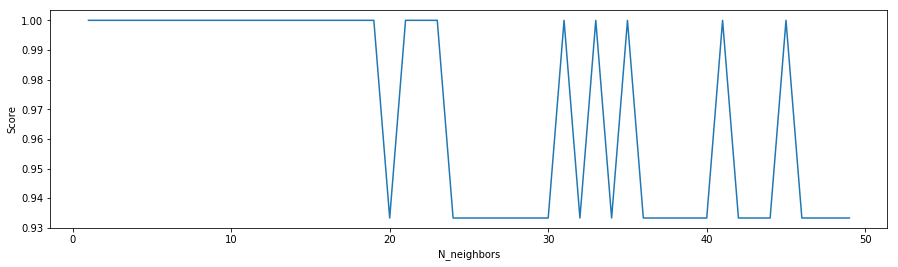

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 4))
N = 50
Score = []

for i in range(1, N):
    my_clf = MyKNeighborsClassifier(n_neighbors = i)
    my_clf.fit(X_train, y_train)
    Score.append(my_clf.score(X_test, y_test))
    
ax.plot(range(1, N), Score)
ax.set_ylabel('Score')
ax.set_xlabel('N_neighbors')

print('Best N_neighbors =', np.argmax(Score) + 1)

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 34.4 s, sys: 107 ms, total: 34.5 s
Wall time: 34.5 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10.5 µs


In [20]:
%time clf.predict(X_test)

CPU times: user 51.5 s, sys: 1.73 ms, total: 51.5 s
Wall time: 51.5 s


array([ 9.,  5.,  8.,  6.,  0.,  7.,  4.,  3.,  5.,  2.,  3.,  1.,  3.,
        8.,  4.,  3.,  6.,  4.,  1.,  9.,  1.,  4.,  7.,  8.,  1.,  4.,
        4.,  0.,  7.,  0.,  1.,  7.,  6.,  6.,  7.,  0.,  5.,  6.,  0.,
        7.,  1.,  6.,  2.,  3.,  3.,  6.,  4.,  5.,  6.,  2.,  3.,  3.,
        7.,  7.,  4.,  6.,  5.,  9.,  4.,  6.,  9.,  4.,  2.,  0.,  6.,
        9.,  4.,  8.,  9.,  4.,  7.,  1.,  5.,  1.,  9.,  9.,  7.,  3.,
        4.,  1.,  3.,  1.,  3.,  0.,  6.,  4.,  6.,  6.,  6.,  1.,  7.,
        0.,  1.,  3.,  1.,  2.,  4.,  0.,  9.,  8.,  5.,  1.,  0.,  9.,
        8.,  5.,  2.,  1.,  1.,  5.,  3.,  3.,  6.,  1.,  0.,  3.,  3.,
        9.,  2.,  6.,  4.,  9.,  3.,  9.,  4.,  3.,  7.,  3.,  0.,  3.,
        4.,  0.,  2.,  8.,  9.,  9.,  7.,  2.,  7.,  0.,  0.,  3.,  2.,
        3.,  6.,  1.,  5.,  8.,  8.,  5.,  3.,  0.,  4.,  6.,  1.,  3.,
        1.,  7.,  7.,  0.,  0.,  6.,  6.,  4.,  1.,  5.,  7.,  1.,  9.,
        9.,  9.,  9.,  9.,  6.,  5.,  4.,  1.,  2.,  9.,  4.,  7

In [21]:
%time my_clf.predict(X_test)

CPU times: user 30.5 s, sys: 400 ms, total: 30.9 s
Wall time: 30.9 s


array([9, 5, 8, 6, 0, 7, 4, 3, 5, 2, 3, 1, 3, 8, 4, 3, 6, 4, 1, 9, 1, 4, 7,
       8, 1, 4, 4, 0, 7, 0, 1, 7, 6, 6, 7, 0, 5, 6, 0, 7, 1, 6, 2, 3, 3, 6,
       4, 5, 6, 2, 3, 3, 7, 7, 4, 6, 5, 9, 4, 6, 9, 4, 2, 0, 6, 9, 4, 8, 9,
       4, 7, 1, 5, 1, 9, 9, 7, 3, 4, 1, 3, 1, 3, 0, 6, 4, 6, 6, 6, 1, 7, 0,
       1, 3, 1, 2, 4, 0, 9, 8, 5, 1, 0, 9, 8, 5, 2, 1, 1, 5, 3, 3, 6, 1, 0,
       3, 3, 9, 2, 6, 4, 9, 3, 9, 4, 3, 7, 3, 0, 3, 4, 0, 2, 8, 9, 9, 7, 2,
       7, 0, 0, 3, 2, 3, 6, 1, 5, 8, 8, 5, 3, 0, 4, 6, 1, 3, 1, 7, 7, 0, 0,
       6, 6, 4, 1, 5, 7, 1, 9, 9, 9, 9, 9, 6, 5, 4, 1, 2, 9, 4, 7, 6, 4, 8,
       5, 9, 1, 8, 2, 3, 5, 6, 1, 6, 7, 0, 9, 2, 8, 1, 0, 1, 2, 3, 4, 9, 7,
       4, 8, 3, 3, 9, 7, 6, 1, 4, 8, 0, 8, 3, 5, 0, 5, 9, 0, 0, 9, 4, 2, 1,
       3, 6, 8, 9, 2, 8, 0, 2, 3, 8, 4, 8, 1, 7, 7, 0, 8, 8, 2, 3, 3, 9, 7,
       7, 6, 8, 1, 3, 3, 3, 8, 2, 1, 5, 6, 9, 6, 5, 4, 4, 2, 4, 5, 3, 9, 5,
       2, 5, 0, 5, 7, 4, 1, 5, 0, 1, 8, 2, 4, 1, 5, 2, 3, 2, 4, 2, 9, 0, 1,
       7, 9,

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 55.3 s, sys: 0 ns, total: 55.3 s
Wall time: 55.3 s


array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 28.5 s, sys: 356 ms, total: 28.9 s
Wall time: 28.9 s


array([9, 5, 8, 6, 0, 7, 4, 3, 5, 2, 3, 1, 3, 8, 4, 3, 6, 4, 1, 9, 1, 4, 7,
       8, 1, 4, 4, 0, 7, 0, 1, 7, 6, 6, 7, 0, 5, 6, 0, 7, 1, 6, 2, 3, 3, 6,
       4, 5, 6, 2, 3, 3, 7, 7, 4, 6, 5, 9, 4, 6, 9, 4, 2, 0, 6, 9, 4, 8, 9,
       4, 7, 1, 5, 1, 9, 9, 7, 3, 4, 1, 3, 1, 3, 0, 6, 4, 6, 6, 6, 1, 7, 0,
       1, 3, 1, 2, 4, 0, 9, 8, 5, 1, 0, 9, 8, 5, 2, 1, 1, 5, 3, 3, 6, 1, 0,
       3, 3, 9, 2, 6, 4, 9, 3, 9, 4, 3, 7, 3, 0, 3, 4, 0, 2, 8, 9, 9, 7, 2,
       7, 0, 0, 3, 2, 3, 6, 1, 5, 8, 8, 5, 3, 0, 4, 6, 1, 3, 1, 7, 7, 0, 0,
       6, 6, 4, 1, 5, 7, 1, 9, 9, 9, 9, 9, 6, 5, 4, 1, 2, 9, 4, 7, 6, 4, 8,
       5, 9, 1, 8, 2, 3, 5, 6, 1, 6, 7, 0, 9, 2, 8, 1, 0, 1, 2, 3, 4, 9, 7,
       4, 8, 3, 3, 9, 7, 6, 1, 4, 8, 0, 8, 3, 5, 0, 5, 9, 0, 0, 9, 4, 2, 1,
       3, 6, 8, 9, 2, 8, 0, 2, 3, 8, 4, 8, 1, 7, 7, 0, 8, 8, 2, 3, 3, 9, 7,
       7, 6, 8, 1, 3, 3, 3, 8, 2, 1, 5, 6, 9, 6, 5, 4, 4, 2, 4, 5, 3, 9, 5,
       2, 5, 0, 5, 7, 4, 1, 5, 0, 1, 8, 2, 4, 1, 5, 2, 3, 2, 4, 2, 9, 0, 1,
       7, 9,

In [24]:
clf.score(X_test, y_test)

0.96714285714285719

In [25]:
my_clf.score(X_test, y_test)

0.96714285714285719

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 36.1 s, sys: 144 ms, total: 36.3 s
Wall time: 36.2 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 32.9 s, sys: 128 ms, total: 33 s
Wall time: 32.9 s


In [30]:
%time clf.predict(X_test)

CPU times: user 54 s, sys: 4.04 ms, total: 54 s
Wall time: 54 s


array([ 8.,  1.,  1.,  4.,  2.,  5.,  1.,  5.,  7.,  9.,  8.,  6.,  0.,
        5.,  7.,  2.,  1.,  1.,  9.,  6.,  1.,  4.,  3.,  6.,  2.,  9.,
        3.,  7.,  7.,  4.,  4.,  6.,  6.,  5.,  9.,  6.,  2.,  1.,  4.,
        3.,  9.,  6.,  0.,  7.,  3.,  6.,  2.,  4.,  7.,  9.,  5.,  9.,
        3.,  5.,  1.,  1.,  6.,  1.,  7.,  6.,  1.,  3.,  1.,  7.,  3.,
        1.,  3.,  6.,  3.,  6.,  8.,  9.,  5.,  7.,  5.,  9.,  0.,  0.,
        6.,  6.,  7.,  1.,  1.,  6.,  6.,  2.,  8.,  6.,  5.,  5.,  6.,
        0.,  2.,  1.,  6.,  6.,  5.,  8.,  0.,  8.,  5.,  8.,  6.,  0.,
        3.,  7.,  7.,  3.,  9.,  1.,  6.,  5.,  3.,  9.,  1.,  1.,  4.,
        4.,  5.,  9.,  2.,  6.,  2.,  8.,  7.,  8.,  0.,  2.,  3.,  6.,
        7.,  4.,  1.,  8.,  0.,  4.,  5.,  1.,  8.,  4.,  2.,  5.,  8.,
        4.,  1.,  7.,  2.,  4.,  2.,  3.,  5.,  9.,  3.,  3.,  1.,  7.,
        0.,  1.,  0.,  5.,  0.,  4.,  7.,  0.,  4.,  9.,  0.,  0.,  8.,
        7.,  0.,  8.,  2.,  8.,  8.,  7.,  0.,  5.,  1.,  6.,  7

In [31]:
%time my_clf.predict(X_test)

CPU times: user 45.7 s, sys: 35.9 ms, total: 45.7 s
Wall time: 45.8 s


array([8, 1, 1, 4, 2, 5, 1, 5, 7, 9, 8, 6, 0, 5, 7, 2, 1, 1, 9, 6, 1, 4, 3,
       6, 2, 9, 3, 7, 7, 4, 4, 6, 6, 5, 9, 6, 2, 1, 4, 3, 9, 6, 0, 7, 3, 6,
       2, 4, 7, 9, 5, 9, 3, 5, 1, 1, 6, 1, 7, 6, 1, 3, 1, 7, 3, 1, 3, 6, 3,
       6, 8, 9, 5, 7, 5, 9, 0, 0, 6, 6, 7, 1, 1, 6, 6, 2, 8, 6, 5, 5, 6, 0,
       2, 1, 6, 6, 5, 8, 0, 8, 5, 8, 6, 0, 3, 7, 7, 3, 9, 1, 6, 5, 3, 9, 1,
       1, 4, 4, 5, 9, 2, 6, 2, 8, 7, 8, 0, 2, 3, 6, 7, 4, 1, 8, 0, 4, 5, 1,
       8, 4, 2, 5, 8, 4, 1, 7, 2, 4, 2, 3, 5, 9, 3, 3, 1, 7, 0, 1, 0, 5, 0,
       4, 7, 0, 4, 9, 0, 0, 8, 7, 0, 8, 2, 8, 8, 7, 0, 5, 1, 6, 7, 0, 5, 1,
       7, 5, 3, 7, 9, 0, 2, 3, 2, 9, 3, 6, 3, 7, 5, 0, 4, 4, 8, 7, 2, 9, 7,
       0, 5, 4, 1, 7, 1, 5, 3, 3, 6, 4, 0, 2, 4, 3, 4, 2, 3, 4, 2, 5, 4, 9,
       1, 0, 3, 0, 8, 0, 3, 7, 3, 7, 0, 8, 3, 9, 6, 1, 9, 9, 6, 4, 3, 0, 6,
       4, 4, 0, 3, 0, 8, 9, 1, 4, 6, 8, 5, 4, 1, 4, 1, 5, 1, 8, 8, 3, 9, 2,
       2, 7, 5, 1, 5, 9, 7, 2, 8, 1, 1, 4, 9, 4, 8, 4, 4, 5, 4, 8, 4, 7, 4,
       3, 2,

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 54.5 s, sys: 0 ns, total: 54.5 s
Wall time: 54.5 s


array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 41.7 s, sys: 0 ns, total: 41.7 s
Wall time: 41.7 s


array([8, 1, 1, 4, 2, 5, 1, 5, 7, 9, 8, 6, 0, 5, 7, 2, 1, 1, 9, 6, 1, 4, 3,
       6, 2, 9, 3, 7, 7, 4, 4, 6, 6, 5, 9, 6, 2, 1, 4, 3, 9, 6, 0, 7, 3, 6,
       2, 4, 7, 9, 5, 9, 3, 5, 1, 1, 6, 1, 7, 6, 1, 3, 1, 7, 3, 1, 3, 6, 3,
       6, 8, 9, 5, 7, 5, 9, 0, 0, 6, 6, 7, 1, 1, 6, 6, 2, 8, 6, 5, 5, 6, 0,
       2, 1, 6, 6, 5, 8, 0, 8, 5, 8, 6, 0, 3, 7, 7, 3, 9, 1, 6, 5, 3, 9, 1,
       1, 4, 4, 5, 9, 2, 6, 2, 8, 7, 8, 0, 2, 3, 6, 7, 4, 1, 8, 0, 4, 5, 1,
       8, 4, 2, 5, 8, 4, 1, 7, 2, 4, 2, 3, 5, 9, 3, 3, 1, 7, 0, 1, 0, 5, 0,
       4, 7, 0, 4, 9, 0, 0, 8, 7, 0, 8, 2, 8, 8, 7, 0, 5, 1, 6, 7, 0, 5, 1,
       7, 5, 3, 7, 9, 0, 2, 3, 2, 9, 3, 6, 3, 7, 5, 0, 4, 4, 8, 7, 2, 9, 7,
       0, 5, 4, 1, 7, 1, 5, 3, 3, 6, 4, 0, 2, 4, 3, 4, 2, 3, 4, 2, 5, 4, 9,
       1, 0, 3, 0, 8, 0, 3, 7, 3, 7, 0, 8, 3, 9, 6, 1, 9, 9, 6, 4, 3, 0, 6,
       4, 4, 0, 3, 0, 8, 9, 1, 4, 6, 8, 5, 4, 1, 4, 1, 5, 1, 8, 8, 3, 9, 2,
       2, 7, 5, 1, 5, 9, 7, 2, 8, 1, 1, 4, 9, 4, 8, 4, 4, 5, 4, 8, 4, 7, 4,
       3, 2,

In [34]:
clf.score(X_test, y_test)

0.9642857142857143

In [35]:
my_clf.score(X_test, y_test)

0.9642857142857143

Задание 5

In [37]:
# seaborn визуализация сложных данных (более высокого уровня чем matplotlib)
# matplotlib визуализация данных
# train_test_split деление данных на train и test
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) считать время в ячейке
# StandardScaler (from sklearn.preprocessing import StandardScaler) приведение к стандартному распределению
# ClassifierMixin вычисляет Score
# NeighborsBase класс для knn (абстрактный класс для "соседей")
# KNeighborsMixin класс для knn (находит соседей)
# SupervisedIntegerMixin клас для knn (содержит fit)